In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
train = pd.read_csv("earnings_train.csv")
test = pd.read_csv("earnings_test_features.csv")
train.head()

,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
0,School District,Duarte Unified,1964469.0,2018-2019,Race,None Reported,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
1,School District,Coronado Unified,3768031.0,2018-2019,Race,None Reported,Associate Degree,0.0,0.0,0.0,0.0
2,School District,Gilroy Unified,4369484.0,2018-2019,Race,Black or African American,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
3,School District,Pleasant Valley,5672553.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Community College Certificate,0.0,0.0,0.0,0.0
4,Legislative District,Senate District 15,NaN,2018-2019,Race,American Indian or Alaska Native,Community College Certificate,0.0,0.0,0.0,0.0


In [13]:
# Removes WAGE_YEAR4; x = what the model uses
X = train.drop(columns=["WAGE_YEAR4"])

# Fills in empty columns with 0
X = X.fillna(0)

# y = what the model tries to predict
y = train["WAGE_YEAR4"]

# Filters; only the numeric columns remain
X = X.select_dtypes(include=["float64", "int64"])

In [14]:
# Splits the data into training and validation sets.
# random_state is used for a consistent split every time.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=50)

In [15]:
# Created an empty linear regression model.
model = LinearRegression()

# Train the model using the training data (finds best-fit line for accurate predictions).
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Makes predictions
y_pred = model.predict(X_valid)

# Average absolute difference between model prediction and actual values
mae = mean_absolute_error(y_valid, y_pred)

# Squares the errors before averaging
mse = mean_squared_error(y_valid, y_pred)

# The square root of mse
rmse = mse ** 0.5

# Prints score values
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 823.7863996923368
RMSE: 2465.9777436132676


In [17]:
# Filters test dataset; only the numeric columns remain
X_test = test.select_dtypes(include=["float64", "int64"])

# Fills in empty columns with 0
X_test = X_test.fillna(0)

# Makes predictions using the trained model
preds = model.predict(X_test)

# Saves predicted values into a CSV file
pd.DataFrame(preds.round(0), columns=['WAGE_YEAR4']).to_csv('preds.csv', index=False)

          Column  Coefficient
0  DISTRICT_CODE    -0.000049
2     WAGE_YEAR2     0.050595
1     WAGE_YEAR1     0.087056
3     WAGE_YEAR3     1.050049


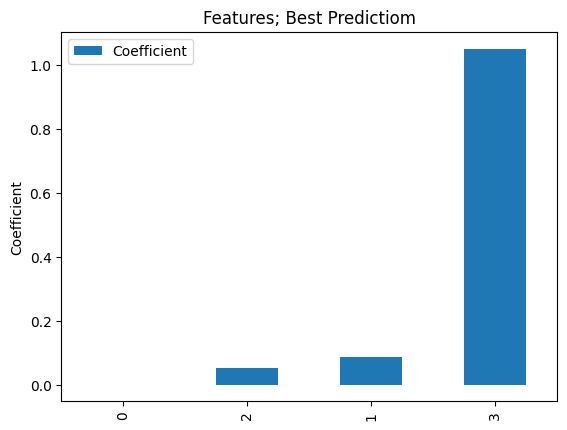

In [18]:
# Question: Which features best predict the target outcome (WAGE_YEAR4)?
#    - In my linear regression model, the features that best predict WAGE_YEAR4 are the numeric columns: DISTRICT_CODE and WAGE_YEAR1-3.   
#    - Based on the coefficient values:
#         - WAGE_YEAR3 has the strongest positive relationship with WAGE_YEAR4, which means a person's year 3 wage is the best indicator for their year 4 wage.
#         - WAGE_YEAR1-2 showed smaller positive relationships.
#         - DISTRICT_CODE has a negative relationship, which means it doesn't strongly influence the outcome.

best_pred = pd.DataFrame({'Column': X_train.columns, 'Coefficient': model.coef_}).sort_values(by='Coefficient')
print(best_pred)
best_pred.plot(kind='bar', title='Features; Best Predictiom')
plt.ylabel('Coefficient')
plt.show()

DISTRICT_TYPE
All                     56684.395349
Legislative District    32318.767209
School District          4836.823385
Name: WAGE_YEAR4, dtype: float64


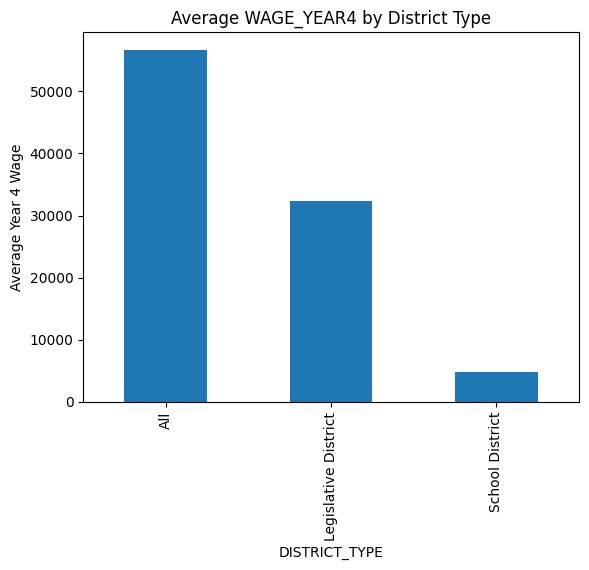

In [19]:
# Question: What does your model say about the people or populations whose data is provided?
#    - My model suggests that people's wages in later years, such as year 4, are most strongly influenced by their wages in earlier years. 
#    - However, when comparing average Year 4 wages across different district types, there are clear differences in outcomes:
#         - All: $56,684 average
#         - Legislative District: $32,318 average
#         - School District: $4,836 average
#    - This shows that people in different districts tend to earn more than others.
#    - Which means district type could play a role in wage differences, even if the linear regression model didn’t weigh it heavily.
#    - Overall, past earnings are still the most reliable predictor of future wages.
#    - However, location or district type may also have some influence on wages.

group_means = train.groupby("DISTRICT_TYPE")["WAGE_YEAR4"].mean()
print(group_means)
group_means.plot(kind='bar', title='Average WAGE_YEAR4 by District Type')
plt.ylabel('Average Year 4 Wage')
plt.show()

In [20]:
# Question: What features, if any, would you like to have had to make a better model?
#    - To make a better model, I would have liked to include more individual/contextual features that could influence wages.
#    - The current dataset mostly includes past wages, district information, awards, demography, and group population. 
#    - However, those categories need depth, not surface-level information, which limits the model in explaining why some people earn more than others.
#    - Examples of what is needed:
#         - Years of work experience.
#         - Major.
#         - Geographic information.
#    - Adding these features would likely improve prediction accuracy and help the model better understand the correlations between categories.
#    - This can help create patterns behind wage differences across different populations.